# ANN to Predict Valence, Categorical

Trying this again, all channels

Setup: Javascript and ipynb stuff

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

## Load Functions

In [1]:
from fastai.vision import *
import os
import numpy as np
import pandas as pd
import pickle
import random
from sklearn import preprocessing

In [4]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/DMD')
path

PosixPath('/media/tris/tris_files/EEG_datasets/DMD')

## Load Original Data Labels

In [6]:
path = '/media/tris/tris_files/EEG_datasets/data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [7]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
df['file_name']=filenames
df['subject_label']=subject_labels
# df=df[['file_name','valence','arousal','dominance','liking']]
df=df[['file_name','subject_label','valence']]
df.tail()

,file_name,subject_label,valence
1275,S32T36,32,3.91
1276,S32T37,32,2.81
1277,S32T38,32,3.05
1278,S32T39,32,3.99
1279,S32T40,32,7.15


In [9]:
df=df.round({'valence': 0})
df.tail()

,file_name,subject_label,valence
1275,S32T36,32,4.0
1276,S32T37,32,3.0
1277,S32T38,32,3.0
1278,S32T39,32,4.0
1279,S32T40,32,7.0


In [10]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/DMD')
path

PosixPath('/media/tris/tris_files/EEG_datasets/DMD')

In [12]:
df.to_csv(path/'labels_proc_val.csv', index=False)

# Load df labels

In [27]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/DMD')
df = pd.read_csv(path/'labels_proc_val.csv') #load labels
df.tail()

,file_name,subject_label,valence
1275,S32T36,32,4.0
1276,S32T37,32,3.0
1277,S32T38,32,3.0
1278,S32T39,32,4.0
1279,S32T40,32,7.0


## Data loader

In [28]:
src = (ImageList.from_csv(path, 'labels_proc_val.csv', folder='heatmaps_32ch', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence'], label_cls = CategoryList))

In [32]:
tfms=get_transforms()

In [33]:
data = (src.transform(tfms, size=400)
        .databunch(bs=5).normalize())

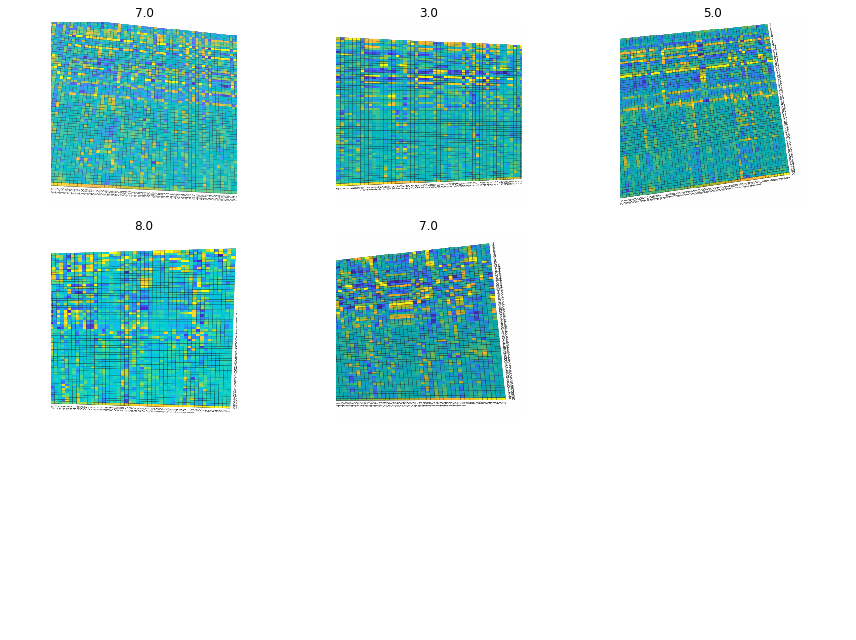

In [34]:
data.show_batch(rows=4, figsize=(12,9))

## Setup Network

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [36]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 200, 200]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 200, 200]       128        True      
______________________________________________________________________
ReLU                 [64, 200, 200]       0          False     
______________________________________________________________________
MaxPool2d            [64, 100, 100]       0          False     
______________________________________________________________________
Conv2d               [64, 100, 100]       36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 100, 100]       128        True      
______________________________________________________________________
ReLU                 [64, 100, 100]       0          False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


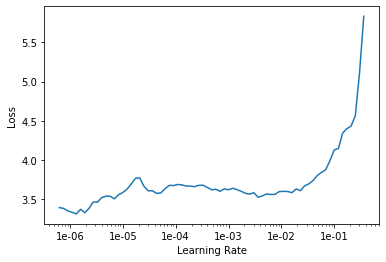

In [37]:
learn.lr_find()
learn.recorder.plot()

## Train last layers

In [38]:
lr = 3e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.481260,2.917110,0.117188,00:22
1,3.106876,2.682612,0.199219,00:22
2,2.852036,2.349413,0.113281,00:22
3,2.575377,2.226930,0.156250,00:22
4,2.423402,2.201898,0.156250,00:22


In [40]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.580965,2.419615,0.125000,00:22
1,2.599751,2.500580,0.109375,00:22
2,2.500045,2.268106,0.136719,00:22
3,2.338909,2.172844,0.179688,00:23
4,2.283340,2.130268,0.222656,00:23


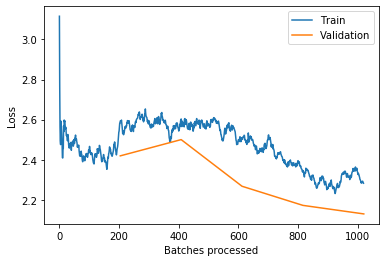

In [41]:
learn.recorder.plot_losses()

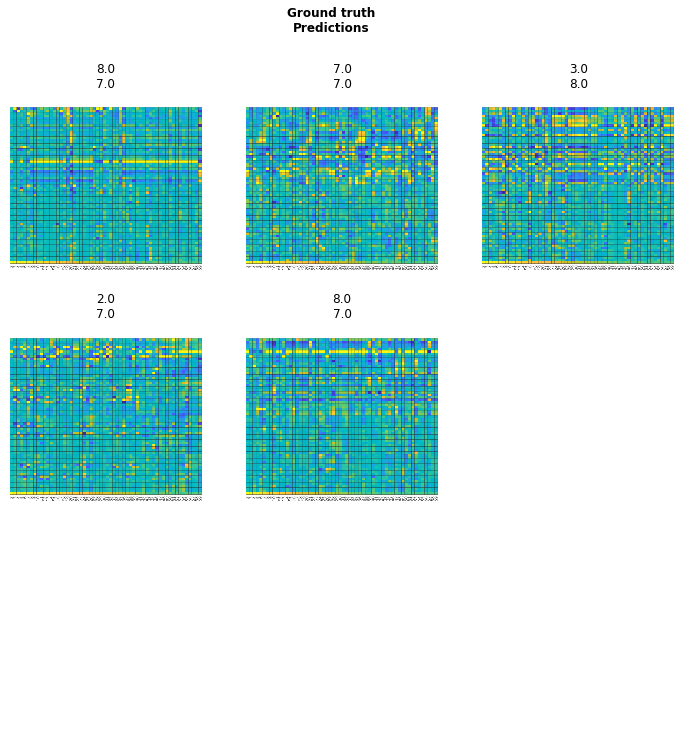

In [42]:
learn.show_results()

## Train the whole network

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


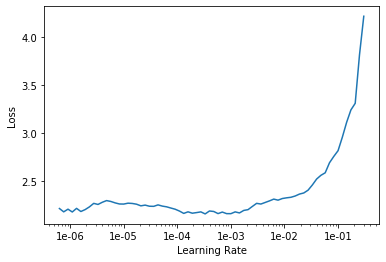

In [43]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [44]:
lr = 1.5e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.340392,2.146036,0.207031,00:26
1,2.361574,2.157023,0.156250,00:26
2,2.310251,2.322825,0.144531,00:26
3,2.200527,2.083036,0.179688,00:26
4,2.242738,2.080012,0.230469,00:26


## Interpret and Results

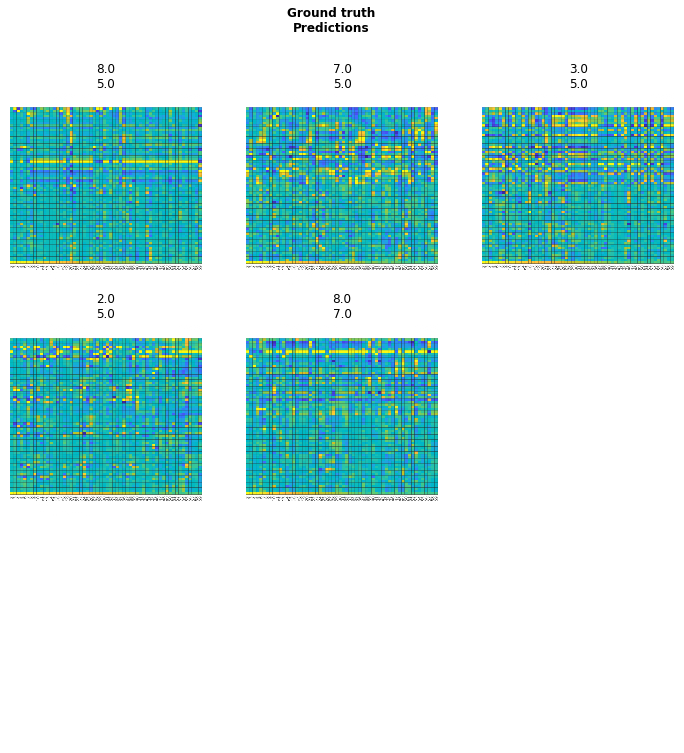

In [46]:
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


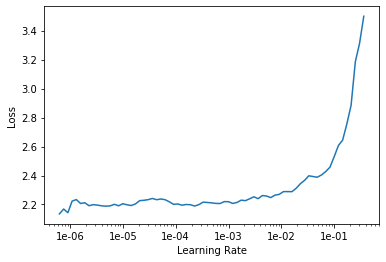

In [47]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [48]:
lr = 2e-4
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.214817,2.058026,0.207031,00:22
1,2.207193,2.079576,0.179688,00:23
2,2.234064,2.073454,0.230469,00:23
3,2.200219,2.069079,0.250000,00:24
4,2.161347,2.071055,0.250000,00:23


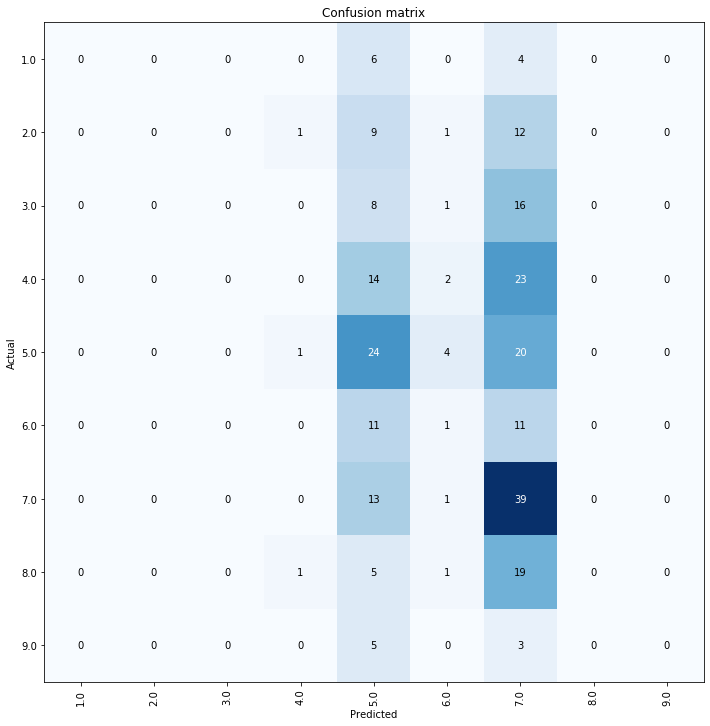

In [49]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix(figsize=(10,10))

lol my dog could just guess 7 and 5 randomly